<a href="https://colab.research.google.com/github/sanskriti-18/BharatIntern/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall -y tensorflow keras
!pip install tensorflow


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: keras 3.3.3
Uninstalling keras-3.3.3:
  Successfully uninstalled keras-3.3.3
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip uninstall -y tensorflow_hub


Found existing installation: tensorflow-hub 0.5.0
Uninstalling tensorflow-hub-0.5.0:
  Successfully uninstalled tensorflow-hub-0.5.0


In [ ]:
!pip install tensorflow_hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [ ]:
import tensorflow as tf

# Verify TensorFlow version
print("TensorFlow Version: ", tf.__version__)
print("Eager Execution: ", tf.executing_eagerly())

# Check TensorFlow Hub version if required
try:
    import tensorflow_hub as hub
    print("TensorFlow Hub Version: ", hub.__version__)
except ImportError:
    print("TensorFlow Hub is not installed.")
except AttributeError as e:
    print(f"TensorFlow Hub import error: {e}")

# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow Version:  2.15.1
Eager Execution:  True
TensorFlow Hub Version:  0.16.1
GPU is NOT AVAILABLE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load the dataset

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Download the zip file using wget
!wget https://github.com/javaidiqbal11/rice-leaf-disease-detection-classification/raw/main/rice-leaf.zip -O /content/rice-leaf.zip

# Step 2: Unzip the file
with zipfile.ZipFile('/content/rice-leaf.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/rice-leaf')

# Define paths for training and validation data
train_dir = os.path.join('/content/rice-leaf', 'train')
validation_dir = os.path.join('/content/rice-leaf', 'validation')


--2024-06-05 06:35:37--  https://github.com/javaidiqbal11/rice-leaf-disease-detection-classification/raw/main/rice-leaf.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javaidiqbal11/rice-leaf-disease-detection-classification/main/rice-leaf.zip [following]
--2024-06-05 06:35:38--  https://raw.githubusercontent.com/javaidiqbal11/rice-leaf-disease-detection-classification/main/rice-leaf.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7816855 (7.5M) [application/zip]
Saving to: ‘/content/rice-leaf.zip’

/content/rice-leaf. 100%[===================>]   7.45M  --.-KB/s    in 0.09s   

2024-06-

Preparing training and validation dataset

In [ ]:
import os

# Define the path to the zip file
zip_file = '/content/rice-leaf/rice'
# Extract the directory where the zip file is located
data_dir = os.path.dirname(zip_file)

# Define paths for training and validation data
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /content/rice-leaf/train : 0files
total images for validation : /content/rice-leaf/validation : 0files


In [ ]:
import os

# Define paths for training and validation data
train_dir = '/content/rice-leaf/rice/train'
validation_dir = '/content/rice-leaf/rice/validation'

# Check the number of files in the training directory
print("Total images for training:", train_dir, ":", len(os.listdir(train_dir)), "files")

# Check the number of files in the validation directory
print("Total images for validation:", validation_dir, ":", len(os.listdir(validation_dir)), "files")


Total images for training: /content/rice-leaf/rice/train : 3 files
Total images for validation: /content/rice-leaf/rice/validation : 3 files


In [ ]:
import os

# Define the paths to the train and validation directories
train_dir = '/content/rice-leaf/rice/train'
validation_dir = '/content/rice-leaf/rice/validation'

# Initialize variables to store the total number of images for training and validation
total_train_images = 0
total_validation_images = 0

# Iterate through the subdirectories in the train directory
for class_name in os.listdir(train_dir):
    # Construct the full path to the class directory within the train directory
    class_dir = os.path.join(train_dir, class_name)
    # Count the number of files (images) in the class directory
    num_train_images = len(os.listdir(class_dir))
    # Print the number of train images for each class
    print(f"Total train images for class '{class_name}': {num_train_images}")
    # Add the number of train images for this class to the total count
    total_train_images += num_train_images

# Iterate through the subdirectories in the validation directory
for class_name in os.listdir(validation_dir):
    # Construct the full path to the class directory within the validation directory
    class_dir = os.path.join(validation_dir, class_name)
    # Count the number of files (images) in the class directory
    num_validation_images = len(os.listdir(class_dir))
    # Print the number of validation images for each class
    print(f"Total validation images for class '{class_name}': {num_validation_images}")
    # Add the number of validation images for this class to the total count
    total_validation_images += num_validation_images

# Print the total number of images for training and validation
print(f"Total train images: {total_train_images}")
print(f"Total validation images: {total_validation_images}")


Total train images for class 'brownspot': 79
Total train images for class 'bacterial_leaf_blight': 53
Total train images for class 'blast': 25
Total validation images for class 'brownspot': 17
Total validation images for class 'bacterial_leaf_blight': 43
Total validation images for class 'blast': 24
Total train images: 157
Total validation images: 84


Label Mapping

In [ ]:
!!wget /rice-leaf-diseases-detection/archive/master.zip
!unzip master.zip;

unzip:  cannot find or open master.zip, master.zip.zip or master.zip.ZIP.


In [ ]:
import json

with open('/content/drive/MyDrive/classes.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())

print (classes)

['Hispa', 'LeafBlast', 'BrownSpot']


In [ ]:
print('Number of classes:',len(classes))

Number of classes: 3


In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

BATCH_SIZE = 64 #@param {type:"integer"}



Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2 with input size (224, 224) and output dimension 1280


Data Preprocessing

In [ ]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    shuffle=False,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)
do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset="training",
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 84 images belonging to 3 classes.
Found 157 images belonging to 3 classes.


In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE+(3,),
                                   output_shape=[FV_SIZE])

In [ ]:
do_fine_tuning = False #@param {type:"boolean"}
if do_fine_tuning:
  feature_extractor.trainable = True
  # unfreeze some layers of base network for fine-tuning
  for layer in base_model.layers[-30:]:
    layer.trainable =True

else:
  feature_extractor.trainable = False

In [ ]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#model.build((None,)+IMAGE_SIZE+(3,))

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 2915395 (11.12 MB)
Trainable params: 657411 (2.51 MB)
Non-trainable params: 2257984 (8.

In [ ]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
import tensorflow as tf

LEARNING_RATE = 0.001  # Set the learning rate

# Compile the model with the specified optimizer learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
EPOCHS=30 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

<ipython-input-34-49a96cf4708e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
2/2 [==============================] - 11s 6s/step - loss: 0.2320 - accuracy: 0.9062 - val_loss: 1.6172 - val_accuracy: 0.5156
Epoch 2/30
2/2 [==============================] - 12s 10s/step - loss: 0.1517 - accuracy: 0.9247 - val_loss: 1.4105 - val_accuracy: 0.6562
Epoch 3/30
2/2 [==============================] - 10s 6s/step - loss: 0.0826 - accuracy: 0.9677 - val_loss: 1.3678 - val_accuracy: 0.6719
Epoch 4/30
2/2 [==============================] - 9s 5s/step - loss: 0.1608 - accuracy: 0.9219 - val_loss: 1.4568 - val_accuracy: 0.7031
Epoch 5/30
2/2 [==============================] - 10s 8s/step - loss: 0.0943 - accuracy: 0.9677 - val_loss: 1.5492 - val_accuracy: 0.7031
Epoch 6/30
2/2 [==============================] - 11s 6s/step - loss: 0.0833 - accuracy: 0.9785 - val_loss: 1.6147 - val_accuracy: 0.6094
Epoch 7/30
2/2 [==============================] - 11s 5s/step - loss: 0.0977 - accuracy: 0.9609 - val_loss: 1.6216 - val_accuracy: 0.5781
Epoch 8/30
2/2 [==================

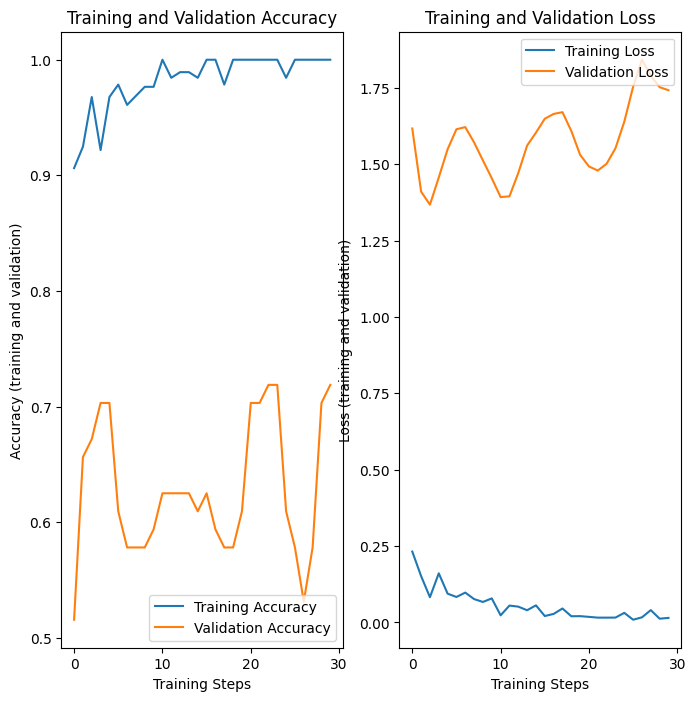

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

SOURCE: class: bacterial_leaf_blight, file: bacterial_leaf_blight/blight_rotated_014.png
1/1 [==============================] - 1s 1s/step
PREDICTED: class: Hispa, Accuracy: 0.998909


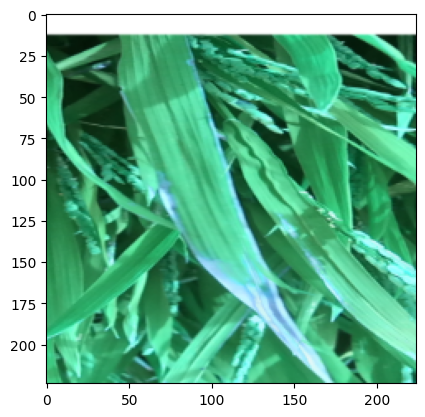

<Figure size 640x480 with 0 Axes>

SOURCE: class: blast, file: blast/blast_rotated_018.png
1/1 [==============================] - 0s 105ms/step
PREDICTED: class: Hispa, Accuracy: 0.964235


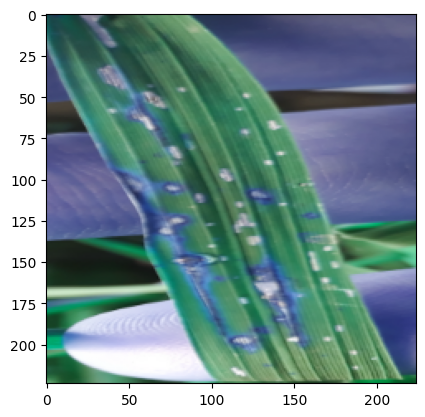

SOURCE: class: brownspot, file: brownspot/brownspot_rotated_016.jpg
1/1 [==============================] - 0s 97ms/step
PREDICTED: class: BrownSpot, Accuracy: 0.758857


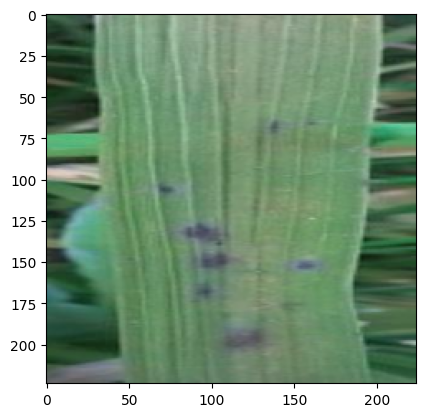

<Figure size 640x480 with 0 Axes>

SOURCE: class: bacterial_leaf_blight, file: bacterial_leaf_blight/blight_rotated_039.jpg
1/1 [==============================] - 0s 115ms/step
PREDICTED: class: Hispa, Accuracy: 0.996345


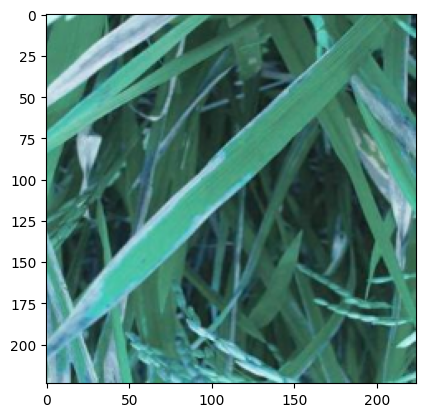

<Figure size 640x480 with 0 Axes>

SOURCE: class: bacterial_leaf_blight, file: bacterial_leaf_blight/blight_rotated_005.jpg
1/1 [==============================] - 0s 92ms/step
PREDICTED: class: Hispa, Accuracy: 0.997290


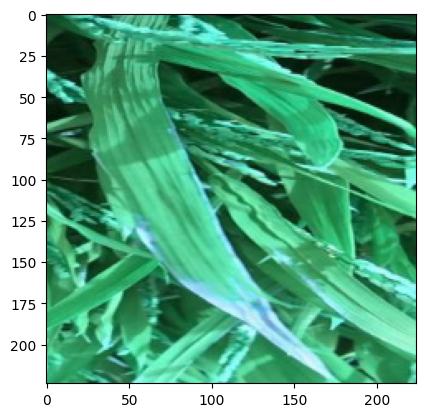

<Figure size 640x480 with 0 Axes>

In [ ]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255

    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)

    return {classes[class_idx]: probabilities[class_idx]}


for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))

    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, Accuracy: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)
    plt.show()